<a href="https://colab.research.google.com/github/grizzler88/Springboard/blob/master/Capstone%20-%20Craft%20Beer/CraftBeer_03_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone 3: Craft Beer Recommendation 

#Pre-processing and Training (Part 3) 

## Import Packages and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('beers_eda.csv', keep_default_na=False)

In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
#df.head()

## Removing Missing Values

Throughout our analysis, we've known that certaion fields have contained 'N/A' values - mainly in relation to Brewery Location, Brewery Type and Beer Availability data.

We wanted to our analyse first to see if it added any insight before making a decision to either drop the rows (and keep the columns) or drop the columns (and keep the rows). Our analysis has shown that a number of columns that contain 'N/A' also look to be worth including in our final modeling, including:
* brewery_region
* brewery_area
* brewery_bar
* beer_availability

To continue to include these as features in our models we will first have to drop the rows which contain null values. This is done below.

In [5]:
print('Number of n/a in Beer Avaialability: ', df[df.beer_availability == 'N/A']['beer_availability'].count())
print('Number of n/a in Brewery Type: ', df[df.brewery_na == 1]['brewery_na'].count())
print('Number of n/a in Brewery Region: ', df[df.brewery_region == 'N/A']['brewery_region'].count())

Number of n/a in Beer Avaialability:  2975
Number of n/a in Brewery Type:  6363
Number of n/a in Brewery Region:  6363


In [6]:
missing_data = df.loc[ (df.beer_availability == 'N/A') | (df.brewery_na == 1) | (df.brewery_region == 'N/A') ]

In [7]:
missing_data.shape

(8874, 26)

In [8]:
missing_data['cluster_target'].value_counts(normalize=True)

0    0.920216
1    0.079784
Name: cluster_target, dtype: float64

In [9]:
df = df.loc[ (df.beer_availability != 'N/A') & (df.brewery_na != 1) & (df.brewery_region != 'N/A') ]

In [10]:
df.shape

(57171, 26)

In [11]:
df.cluster_target.value_counts(normalize=True)

0    0.945025
1    0.054975
Name: cluster_target, dtype: float64

In [12]:
df.cluster_target.value_counts()

0    54028
1     3143
Name: cluster_target, dtype: int64

## Dataset for Comparison Later

We will want to compare are model vs real result later on (i.e. average scores and number of reviews) so we will create a copy of the dataset while it still contains these data points.

In [13]:
df_compare = df

## Dropping Columns

Throughout the analysis, we have looked through the various different columns in the data to gather whether we beleive they will add value to our modelling. Based on the EDA to date, we believe it makes sense to delete the following columns (with reason in brackets):

* beer_name (too many dimensions)
* brewery_name (too many dimensions)
* beer_style_detail (captured by beer_type and beer_style)
* beer_retired (not actionable)
* brewery_city (captured by beer_region and beer_area)
* brewery_state (captured by beer_region and beer_area)
* brewery_country (captured by beer_region and beer_area)
* brewery_beertogo (highly correlated with brewery_bar)
* brewery_eatery (highly correlated with brewery_bar)
* brewery_brewery (not significatn in analysis)
* brewery_homebrew (not significatn in analysis)
* brewery_store (not significatn in analysis)
* brewery_na (null values)
* cluster (captured in target variable)
* number_reviews (captured in target variable)
* mean_score (captured in target variable)
* std_score (captured in target variable)
* review_recency (captured in target variable)

Below we have looked to remove these.

In [14]:
#df.columns

In [15]:
drop_list = ['brewery_name', 'beer_name', 'beer_style_detail', 
       'brewery_city', 'brewery_state', 'brewery_country', 
       'beer_retired', 'brewery_beertogo', 'brewery_brewery',
       'brewery_eatery', 'brewery_homebrew', 'brewery_store', 'brewery_na',
       'number_reviews', 'mean_score', 'std_score', 'recency_review',
       'cluster']

In [16]:
df.drop(columns=drop_list, inplace=True)

In [17]:
#df.head()

## Creating Dummy Values

Lastly, we will turn our remaining categorical variables into dummy variable to allow them be used in our modelling.

In [18]:
dummy_beer_type = pd.get_dummies(df.beer_type, prefix='type', drop_first=True)
dummy_beer_style = pd.get_dummies(df.beer_style, prefix='style', drop_first=True)
dummy_brewery_region = pd.get_dummies(df.brewery_region, prefix='region', drop_first=True)
dummy_brewery_area = pd.get_dummies(df.brewery_area, prefix='area', drop_first=True)
dummy_beer_availability = pd.get_dummies(df.beer_availability, prefix='availability', drop_first=True)

In [19]:
df = pd.concat([df, dummy_beer_type, dummy_beer_style, dummy_beer_availability, dummy_brewery_region, dummy_brewery_area], axis=1).drop(columns=['beer_type', 'beer_style', 'brewery_region', 'brewery_area', 'beer_availability'])

In [20]:
df.sample(10)

,beer_abv,brewery_bar,cluster_target,type_Lager,style_Brown Ale,style_Dark Ale,style_Dark Lager,style_Hybrid Beer,style_IPA,style_Pale Ale,style_Pale Lager,style_Porter,style_Speciality Beer,style_Stout,style_Strong Ale,style_Wheat Beer,style_Wild / Sour Beer,availability_Rotational,availability_Year Round,region_Europe,region_ROW,region_USA,area_California,area_Canada,area_Colorado,area_Europe,area_Germany,area_Massachusetts,area_Michigan,area_New York,area_Oregon,area_Pennsylvania,area_ROW,area_USA,area_United Kingdom,area_Wisconsin
19339,5.000000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
36019,8.100000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3391,4.100000,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2346,6.100000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8733,4.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
37430,5.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32407,3.500000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
35364,5.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
54315,5.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
50647,5.465622,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(57171, 36)

## Train / Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['cluster_target'], axis=1)
y = df['cluster_target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=293)

## Scaling Data

In [25]:
X_train_dummy = X_train.drop(columns='beer_abv')
X_test_dummy = X_test.drop(columns='beer_abv')

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=list(X_train.columns))
X_test_scaled = pd.DataFrame(X_test_scaled, columns=list(X_test.columns))

In [28]:
X_train = pd.concat([X_train_scaled['beer_abv'], X_train_dummy.reset_index().drop(columns='index')], axis=1)
X_test = pd.concat([X_test_scaled['beer_abv'], X_test_dummy.reset_index().drop(columns='index')], axis=1)

In [29]:
print(X_train.shape)
print(X_test.shape)

(42878, 35)
(14293, 35)


## Rebalancing the Data

As we saw earlier, our target class is imbalanced with 3,143 (1) to 54,028 (0). This imblance can impact on the learning phase and the subsequent prediction of machine learning algorithms we look to apply. In general the greater the imbalanced ratio, the decision function will favor the class with the larger number of samples (referred as the majority class).

To avoid this issue impacting on our modelling we will look to rebalance our dataset using random sampling. This is process where we look to balance our training dataset by either randomly reducing our majority class samples (Under Sampling) or randomly increasing our minority class samples (Over Sampling). For our data, we will focus on Over Sampling.  

The simplest way to do this is to generate new samples by randomly sampling with replacement the current available samples. This can done using imbalanced learn (imblearn) RandomOverSampler function. Another approach to this is using either the SMOTE and ADASYN function in imblearn's package which generate new samples by interpolation. 

For the purposes of this project, we will using the SMOTE fucntion.

https://imbalanced-learn.org/stable/introduction.html 

https://imbalanced-learn.org/stable/over_sampling.html

https://imbalanced-learn.org/stable/common_pitfalls.html

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=354)

X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
X_train_resampled = pd.DataFrame(X_train_resampled, columns=list(X_train.columns))

In [32]:
X_train_resampled.shape

(81064, 35)

In [33]:
y_train_resampled.shape

(81064,)

## Recursive Feature Engineering

Lastly, we want to see if we can reduce the number of features in our dataset before applying it to our models.

To do this, we will apply Recursive Feature Engineering model that identifies the optimal number of features by repeately running a model to measure performance and rank features and dropping the least important feature until it runs out features. This will then suggest the optimal number of features based on the performance


To do this, we will apply Recursive Feature Engineering model that identifies the optimal number of features by recursively considering smaller and smaller sets of features. Intially, the model is estimated on all featues and the importance of each is ranked - with the lowest being dropped. This process continues until there is no more features remaing. The optimal number of features is then decided by the model which performs best - in our cases this is accuracy.

The results of the model suggest 29 features is the optimatl with 7 features being dropped:
* area_Canada 
* area_United Kingdom 
* style_Wheat Beer
* region_USA
* style_Strong Ale 
* area_Germany

In [34]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

estimator = GradientBoostingClassifier(random_state=41)
cv = StratifiedKFold(n_splits=3, random_state=368)
rfecv = RFECV(estimator, step=1, scoring='accuracy', cv=cv)
rfecv.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFECV(cv=StratifiedKFold(n_splits=3, random_state=368, shuffle=False),
      estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='deviance',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='deprecated',
                                           

In [35]:
cols = rfecv.get_support(indices=True)

X_rfecv = X_train_resampled.iloc[:,cols]

X_rfecv.head()
X_rfecv.shape
#X_rfecv.columns

(81064, 29)

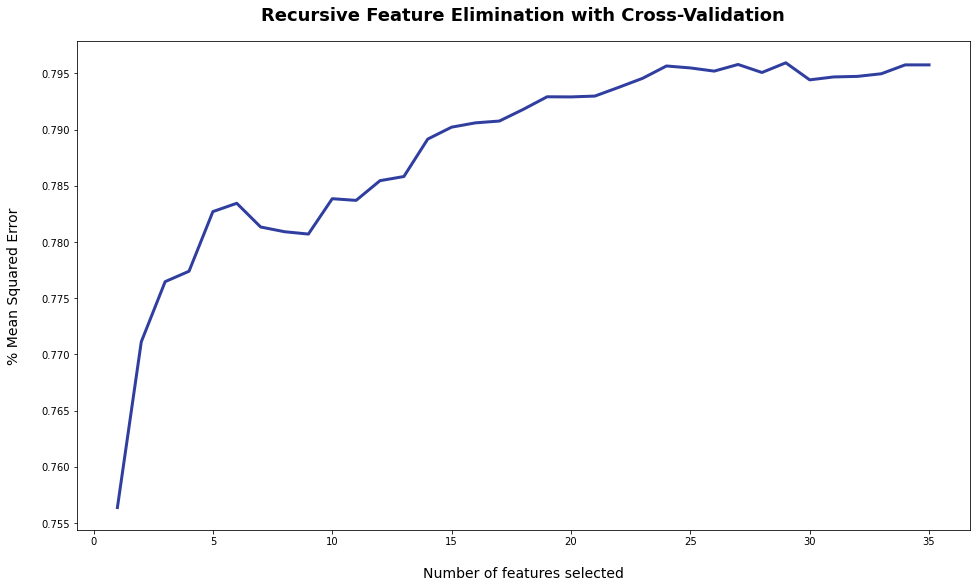

Optimal number of features : 29


In [36]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Mean Squared Error', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

print("Optimal number of features : %d" % rfecv.n_features_)

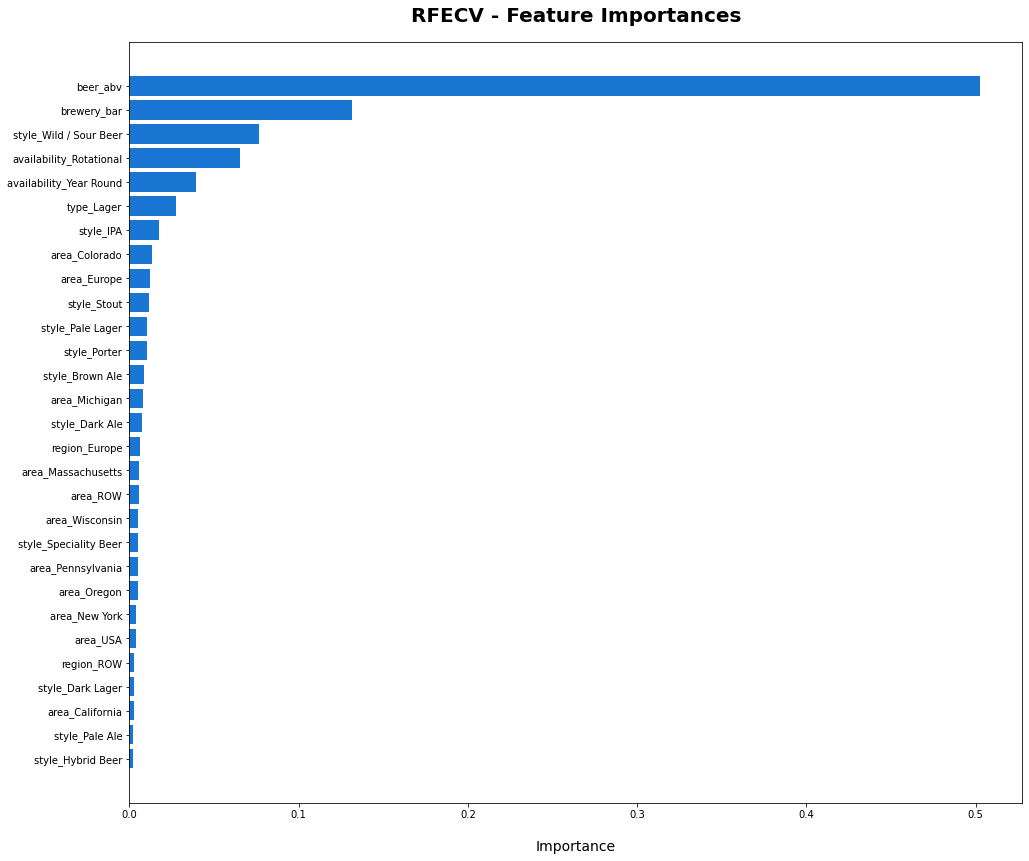

In [37]:
dset = pd.DataFrame()
dset['attr'] = X_rfecv.columns
dset['importance'] = np.absolute(rfecv.estimator_.feature_importances_)

dset = dset.sort_values(by='importance', ascending=True)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [38]:
#rfecv.support_
#rfecv.ranking_

In [39]:
drop_cols = list(set(X_train_resampled.columns).difference(X_rfecv.columns))
print(drop_cols)

['area_United Kingdom', 'style_Strong Ale', 'region_USA', 'area_Germany', 'style_Wheat Beer', 'area_Canada']


## Final Data for Modelling

In [40]:
X_train = rfecv.transform(X_train_resampled)
X_test = rfecv.transform(X_test)

In [41]:
y_train = y_train_resampled